<a href="https://colab.research.google.com/github/jyoon0319/2023S/blob/main/%5Bupdated%5DCh_03_%EA%B7%B8%EB%9E%98%ED%94%84%EC%99%80_%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3. 그래프와 워드클라우드

## 3.1  단어 빈도 그래프

In [7]:
import nltk
nltk.download('gutenberg')

from nltk.corpus import gutenberg
file_names = gutenberg.fileids() #파일 제목을 읽어온다.
print(file_names)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [8]:
doc_alice = gutenberg.open('carroll-alice.txt').read()
print('#Num of characters used:', len(doc_alice)) #사용된 문자의 수
print('#Text sample:')
print(doc_alice[:500]) #앞의 500자만 출력

#Num of characters used: 144395
#Text sample:
[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy an


In [9]:

from nltk.tokenize import word_tokenize
nltk.download('punkt')

tokens_alice = word_tokenize(doc_alice) #토큰화 실행
print('#Num of tokens used:', len(tokens_alice))
print('#Token sample:')
print(tokens_alice[:20])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#Num of tokens used: 33494
#Token sample:
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning']


In [10]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

stem_tokens_alice = [stemmer.stem(token) for token in tokens_alice] #모든 토큰에 대해 스테밍 실행
print('#Num of tokens after stemming:', len(stem_tokens_alice))
print('#Token sample:')
print(stem_tokens_alice[:20])

#Num of tokens after stemming: 33494
#Token sample:
['[', 'alic', "'s", 'adventur', 'in', 'wonderland', 'by', 'lewi', 'carrol', '1865', ']', 'chapter', 'i', '.', 'down', 'the', 'rabbit-hol', 'alic', 'wa', 'begin']


In [13]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

lem_tokens_alice = [lemmatizer.lemmatize(token) for token in tokens_alice] #모든 토큰에 대해 스테밍 실행
print('#Num of tokens after lemmatization:', len(lem_tokens_alice))
print('#Token sample:')
print(lem_tokens_alice[:20])

#Num of tokens after lemmatization: 33494
#Token sample:
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'wa', 'beginning']


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w']{3,}") 

reg_tokens_alice = tokenizer.tokenize(doc_alice.lower())
print('#Num of tokens with RegexpTokenizer:', len(reg_tokens_alice))
print('#Token sample:')
print(reg_tokens_alice[:20])

#Num of tokens with RegexpTokenizer: 21616
#Token sample:
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'down', 'the', 'rabbit', 'hole', 'alice', 'was', 'beginning', 'get', 'very', 'tired', 'sitting', 'her', 'sister']


In [17]:
from nltk.corpus import stopwords #일반적으로 분석대상이 아닌 단어들
nltk.download('stopwords')
english_stops = set(stopwords.words('english')) #반복이 되지 않도록 set으로 변환

result_alice = [word for word in reg_tokens_alice if word not in english_stops] #stopwords를 제외한 단어들만으로 list를 생성

print('#Num of tokens after stopword elimination:', len(result_alice))
print('#Token sample:')
print(result_alice[:20])

#Num of tokens after stopword elimination: 12999
#Token sample:
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'rabbit', 'hole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
alice_word_count = dict()
for word in result_alice:
    alice_word_count[word] = alice_word_count.get(word, 0) + 1

print('#Num of used words:', len(alice_word_count))

sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True)

print("#Top 20 high frequency words:")
for key in sorted_word_count[:20]: #빈도수 상위 20개의 단어를 출력
    print(f'{repr(key)}: {alice_word_count[key]}', end=', ')

#Num of used words: 2687
#Top 20 high frequency words:
'said': 462, 'alice': 385, 'little': 128, 'one': 98, 'know': 88, 'like': 85, 'went': 83, 'would': 78, 'could': 77, 'thought': 74, 'time': 71, 'queen': 68, 'see': 67, 'king': 61, 'began': 58, 'turtle': 57, "'and": 56, 'way': 56, 'mock': 56, 'quite': 55, 

In [20]:
nltk.download('averaged_perceptron_tagger')
my_tag_set = ['NN', 'VB', 'VBD', 'JJ']
my_words = [word for word, tag in nltk.pos_tag(result_alice) if tag in my_tag_set]
#print(my_words)

alice_word_count = dict()
for word in my_words:
    alice_word_count[word] = alice_word_count.get(word, 0) + 1

print('#Num of used words:', len(alice_word_count))

sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True)

print("#Top 20 high frequency words:")
for key in sorted_word_count[:20]: #빈도수 상위 20개의 단어를 출력
    print(f'{repr(key)}: {alice_word_count[key]}', end=', ')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


#Num of used words: 1726
#Top 20 high frequency words:
'said': 462, 'alice': 293, 'little': 124, 'went': 83, 'time': 71, 'queen': 66, 'began': 58, 'way': 56, 'turtle': 56, 'mock': 55, 'thought': 54, 'thing': 49, 'voice': 48, 'head': 46, 'gryphon': 45, 'got': 44, 'rabbit': 42, 'looked': 42, 'see': 42, 'came': 40, 

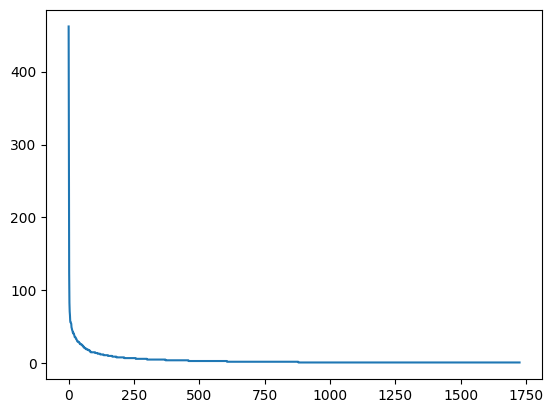

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

w = [alice_word_count[key] for key in sorted_word_count] #정렬된 단어 리스트에 대해 빈도수를 가져와서 리스트 생성
plt.plot(w)
plt.show()

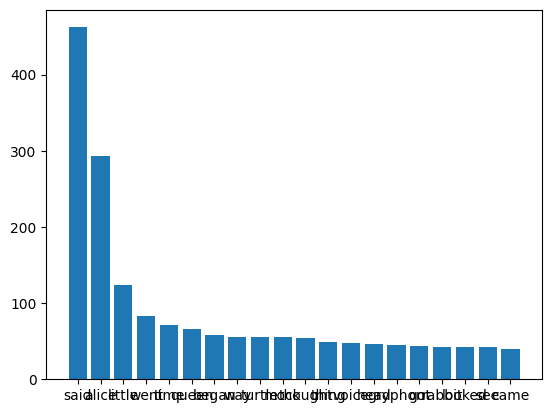

In [22]:
n = sorted_word_count[:20] #빈도수 상위 20개의 단어만 추출
w = [alice_word_count[key] for key in n] #추출된 단어에 대해 빈도를 추출
plt.bar(range(len(n)),w,tick_label=n) #막대그래프를 그림
plt.show()

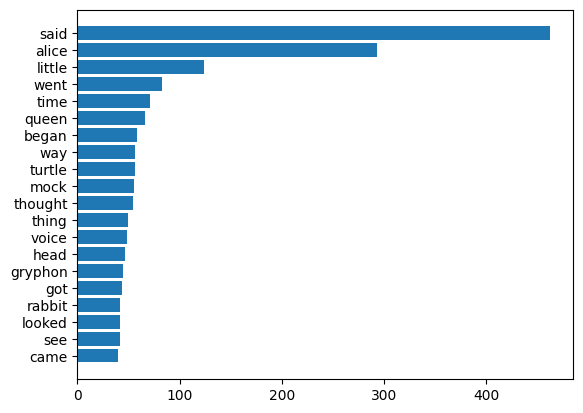

In [23]:
n = sorted_word_count[:20][::-1] #빈도수 상위 20개의 단어를 추출하여 역순으로 정렬
w = [alice_word_count[key] for key in n]
plt.barh(range(len(n)),w,tick_label=n) #수평 막대그래프
plt.show()

## 3.2 워드클라우드

In [24]:
#설치
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


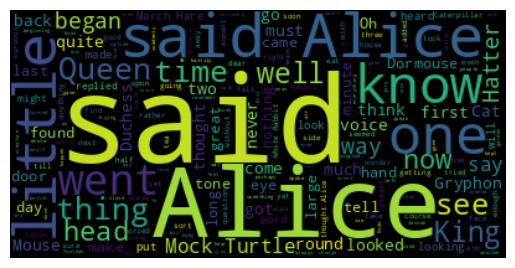

In [25]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(doc_alice)

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear') #이미지를 출력
plt.show()

In [26]:
wordcloud.to_array().shape

(200, 400, 3)

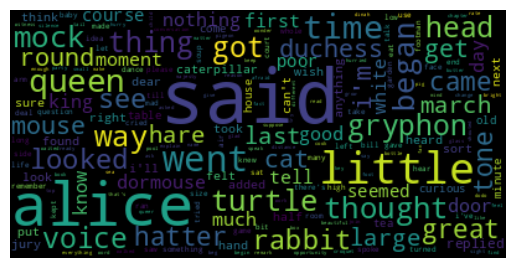

In [27]:
wordcloud = WordCloud(max_font_size=60).generate_from_frequencies(alice_word_count)
plt.figure()
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

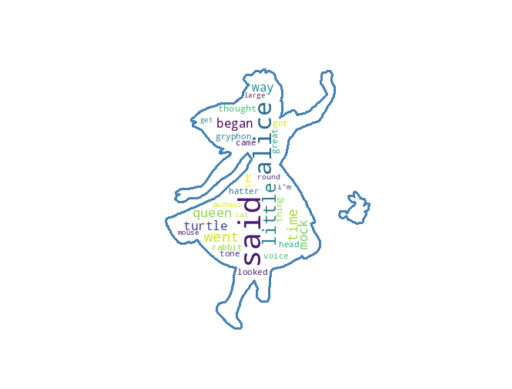

In [29]:
import numpy as np
from PIL import Image

alice_mask = np.array(Image.open("/content/sphx_glr_masked_002.png")) # 배경이미지를 불러와서 numpy array로 변환
wc = WordCloud(background_color="white", # 배경색 지정
               max_words=30, # 출력할 최대 단어 수
               mask=alice_mask, # 배경으로 사용할 이미지
               contour_width=3,  # 테두리선의 크기
               contour_color='steelblue') # 테두리선의 색

wc.generate_from_frequencies(alice_word_count) # 워드 클라우드 생성

wc.to_file("alice.png") # 결과를 이미지 파일로 저장

# 화면에 결과를 출력
plt.figure()
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()

## 3.3 한국어 문서에 대한 그래프와 워드클라우드

In [ ]:
from konlpy.corpus import kolaw
const_doc = kolaw.open('constitution.txt').read()

print(type(const_doc)) #가져온 데이터의 type을 확인
print(len(const_doc))
print(const_doc[:600])

In [ ]:
from konlpy.tag import Okt
t = Okt()
tokens_const = t.morphs(const_doc) #형태소 단위로 tokenize

print('#토큰의 수:', len(tokens_const))
print('#앞 100개의 토큰')
print(tokens_const[:100])

In [ ]:
tokens_const = t.nouns(const_doc) #형태소 단위로 tokenize 후 명사만 추출
print('#토큰의 수:', len(tokens_const))
print('#앞 100개의 토큰')
print(tokens_const[:100])

In [ ]:
tokens_const = [token for token in tokens_const if len(token) > 1]
print('#토큰의 수:', len(tokens_const))
print('#앞 100개의 토큰')
print(tokens_const[:100])

In [ ]:
from matplotlib import font_manager, rc
import platform

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# 맥인 경우에는 아래와 같이 font_name을 지정
# font_name = 'AppleGothic'
rc('font', family=font_name)

const_cnt = {}
for word in tokens_const:
    const_cnt[word] = const_cnt.get(word, 0) + 1

def word_graph(cnt, max_words=10):
    
    sorted_w = sorted(cnt.items(), key=lambda kv: kv[1])
    print(sorted_w[-max_words:])
    n, w = zip(*sorted_w[-max_words:])

    plt.barh(range(len(n)),w,tick_label=n)
    #plt.savefig('bar.png')  # 필요한 경우, 그래프를 이미지 파일로 저장한다.
    plt.show()

word_graph(const_cnt, max_words=20)

In [ ]:
font_path = 'c:/Windows/Fonts/malgun.ttf'
# 맥인 경우에는 아래와 같이 font_path를 지정
# font_path = 'AppleGothic'
wordcloud = WordCloud(font_path = font_path).generate(const_doc)

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [ ]:
wordcloud = WordCloud(
    font_path = font_path,
    max_font_size = 100,
    width = 800, #이미지 너비 지정
    height = 400, #이미지 높이 지정
    background_color='white', #이미지 배경색 지정
    max_words=50)

wordcloud.generate_from_frequencies(const_cnt) #원문이 아닌 형태소 분석 결과로부터 워드클라우드를 생성
wordcloud.to_file("const.png") #생성한 이미지를 파일로 저장

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

![](https://github.com/jyoon0319/2023S/blob/main/wordcloud.png?raw=1)

![](https://github.com/jyoon0319/2023S/blob/main/wordcloud_n.png?raw=1)